# Task
Analyze the `Delivery_Logistics.csv` dataset by performing an initial data overview (structure, types, dimensions), generating statistical summaries, identifying and strategizing for missing values, converting relevant columns to appropriate data types (especially time-related columns), and conducting both univariate and bivariate analyses, followed by visualizations to understand distributions and relationships between key variables such as `delivery_cost`, `delivery_partner`, `weather_condition`, and `delayed` status.

## Aperçu Initial des Données

### Subtask:
Comprendre la structure du DataFrame, afficher les premières lignes, les noms des colonnes, leurs types de données et la taille du dataset.


**Reasoning**:
To understand the structure of the DataFrame, I will display the first few rows, get a concise summary of the DataFrame including non-null counts and data types, and show its dimensions (rows, columns).



In [ ]:
print("Premières 5 lignes du DataFrame:")
print(df.head())

print("\nInformations sur le DataFrame (y compris les types de données et les valeurs non nulles):")
df.info()

print("\nDimensions du DataFrame (lignes, colonnes):")
print(df.shape)

Premières 5 lignes du DataFrame:
   delivery_id delivery_partner      package_type vehicle_type delivery_mode  \
0       250.99        delhivery  automobile parts         bike      same day   
1       250.99       xpressbees         cosmetics       ev van       express   
2       250.99        shadowfax         groceries        truck       two day   
3       250.99              dhl       electronics       ev van      same day   
4       250.99              dhl          clothing          van       two day   

    region weather_condition  distance_km  package_weight_kg  \
0     west             clear        297.0              46.96   
1  central              cold         89.6              47.39   
2     east             rainy        273.5              26.89   
3     east              cold        269.7              12.69   
4    north             foggy        256.7              37.02   

             delivery_time_hours            expected_time_hours delayed  \
0  1970-01-01 00:00:00.000

## Résumé Statistique des Données

### Subtask:
Obtenir un aperçu rapide des statistiques descriptives pour les colonnes numériques (moyenne, écart-type, min/max, quartiles).


**Reasoning**:
To obtain a quick overview of descriptive statistics for numerical columns, I will use the `.describe()` method on the DataFrame `df`, which provides statistics such as mean, standard deviation, min/max, and quartiles.



In [ ]:
print("Statistiques descriptives pour les colonnes numériques:")
print(df.describe())

Statistiques descriptives pour les colonnes numériques:
        delivery_id   distance_km  package_weight_kg  delivery_rating  \
count  25000.000000  25000.000000       25000.000000     25000.000000   
mean   12500.500000    150.390436          25.145898         3.666000   
std     7212.732314     86.409745          14.368663         1.149964   
min      250.990000      3.600000           0.670000         1.000000   
25%     6250.750000     75.900000          12.680000         3.000000   
50%    12500.500000    151.000000          25.145000         4.000000   
75%    18750.250000    224.900000          37.660000         5.000000   
max    24750.010000    297.100000          49.520000         5.000000   

       delivery_cost  
count   25000.000000  
mean      864.944579  
std       435.712593  
min        95.667400  
25%       490.800000  
50%       867.535000  
75%      1237.910000  
max      1632.720600  


## Gestion des Valeurs Manquantes

### Subtask:
Identifier la présence et le nombre de valeurs manquantes dans chaque colonne du dataset et décider de la stratégie de gestion.


**Reasoning**:
To identify the presence and count of missing values in each column, I will calculate the sum of null values for every column in the DataFrame.



In [ ]:
print("Nombre de valeurs manquantes par colonne:")
print(df.isnull().sum())

Nombre de valeurs manquantes par colonne:
delivery_id            0
delivery_partner       0
package_type           0
vehicle_type           0
delivery_mode          0
region                 0
weather_condition      0
distance_km            0
package_weight_kg      0
delivery_time_hours    0
expected_time_hours    0
delayed                0
delivery_status        0
delivery_rating        0
delivery_cost          0
dtype: int64


## Analyse et Conversion des Types de Données

### Subtask:
Vérifier et ajuster les types de données des colonnes, notamment convertir les colonnes de temps ('delivery_time_hours', 'expected_time_hours') en un format de temps approprié pour une analyse plus poussée.


**Reasoning**:
To convert the 'delivery_time_hours' and 'expected_time_hours' columns to datetime objects, I will use the `pd.to_datetime()` function. After the conversion, I will verify the data types using `df.info()` to ensure the changes were successful.



In [ ]:
df['delivery_time_hours'] = pd.to_datetime(df['delivery_time_hours'])
df['expected_time_hours'] = pd.to_datetime(df['expected_time_hours'])

print("Types de données après conversion des colonnes de temps:")
df.info()

Types de données après conversion des colonnes de temps:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   delivery_id          25000 non-null  float64       
 1   delivery_partner     25000 non-null  object        
 2   package_type         25000 non-null  object        
 3   vehicle_type         25000 non-null  object        
 4   delivery_mode        25000 non-null  object        
 5   region               25000 non-null  object        
 6   weather_condition    25000 non-null  object        
 7   distance_km          25000 non-null  float64       
 8   package_weight_kg    25000 non-null  float64       
 9   delivery_time_hours  25000 non-null  datetime64[ns]
 10  expected_time_hours  25000 non-null  datetime64[ns]
 11  delayed              25000 non-null  object        
 12  delivery_status      25000 non-

## Analyse Univariée des Variables Catégorielles

### Subtask:
Examiner la distribution de chaque variable catégorielle (par exemple, delivery_partner, package_type, region, weather_condition) en comptant les occurrences uniques.


**Reasoning**:
To analyze the univariate distribution of categorical variables, I will iterate through the specified categorical columns and use the `.value_counts()` method to display the frequency of each unique value.



In [ ]:
categorical_cols = ['delivery_partner', 'package_type', 'vehicle_type', 'delivery_mode', 'region', 'weather_condition', 'delayed', 'delivery_status']

for col in categorical_cols:
    print(f"\nDistribution de la colonne '{col}':")
    print(df[col].value_counts())



Distribution de la colonne 'delivery_partner':
delivery_partner
xpressbees          2826
fedex               2818
dhl                 2802
ekart               2801
blue dart           2798
delhivery           2786
shadowfax           2736
ecom express        2722
amazon logistics    2711
Name: count, dtype: int64

Distribution de la colonne 'package_type':
package_type
fragile items       2848
pharmacy            2810
documents           2805
automobile parts    2795
electronics         2792
clothing            2767
furniture           2746
cosmetics           2744
groceries           2693
Name: count, dtype: int64

Distribution de la colonne 'vehicle_type':
vehicle_type
ev bike    4218
van        4187
scooter    4174
bike       4160
truck      4145
ev van     4116
Name: count, dtype: int64

Distribution de la colonne 'delivery_mode':
delivery_mode
two day     6302
same day    6279
express     6233
standard    6186
Name: count, dtype: int64

Distribution de la colonne 'region':
region

## Analyse Univariée des Variables Numériques

### Subtask:
Étudier la distribution de chaque variable numérique (par exemple, distance_km, package_weight_kg, delivery_cost, delivery_rating) à l'aide d'histogrammes et de boîtes à moustaches pour détecter les tendances et les valeurs aberrantes.


**Reasoning**:
To analyze the univariate distribution of numerical variables, I will import `matplotlib.pyplot` and `seaborn`, then iterate through the specified numerical columns to generate and display histograms and box plots for each, providing insights into their distribution and potential outliers.



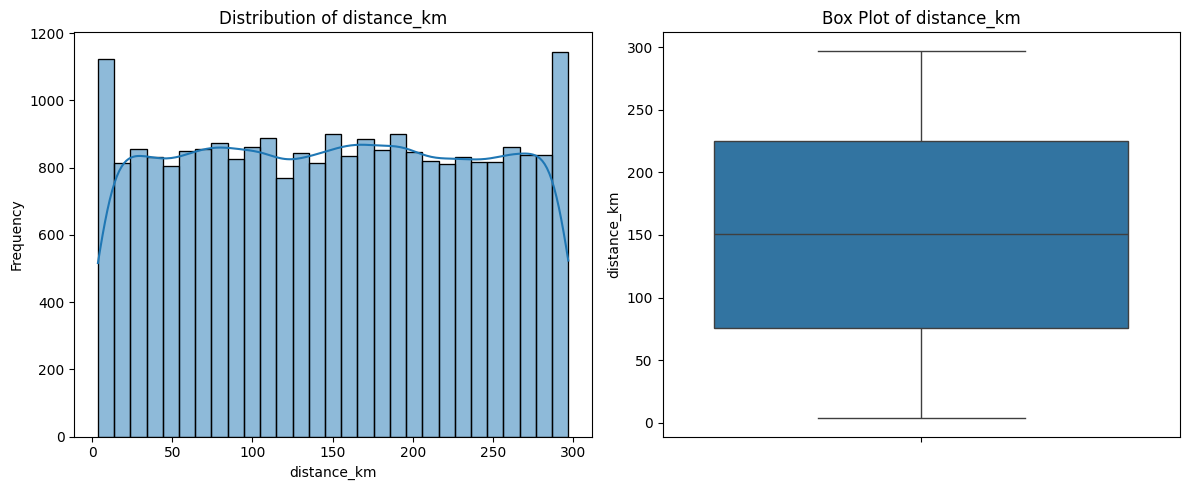

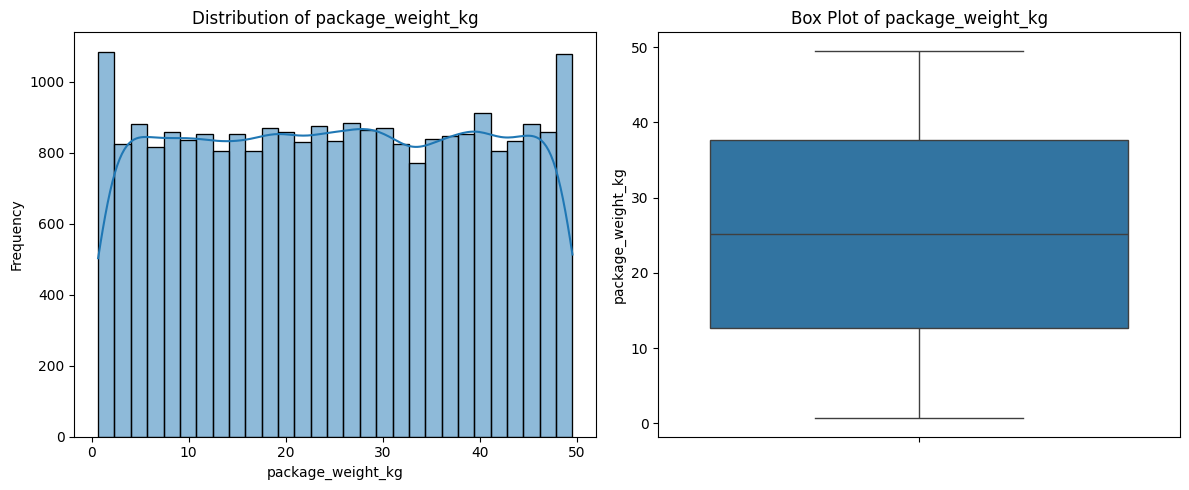

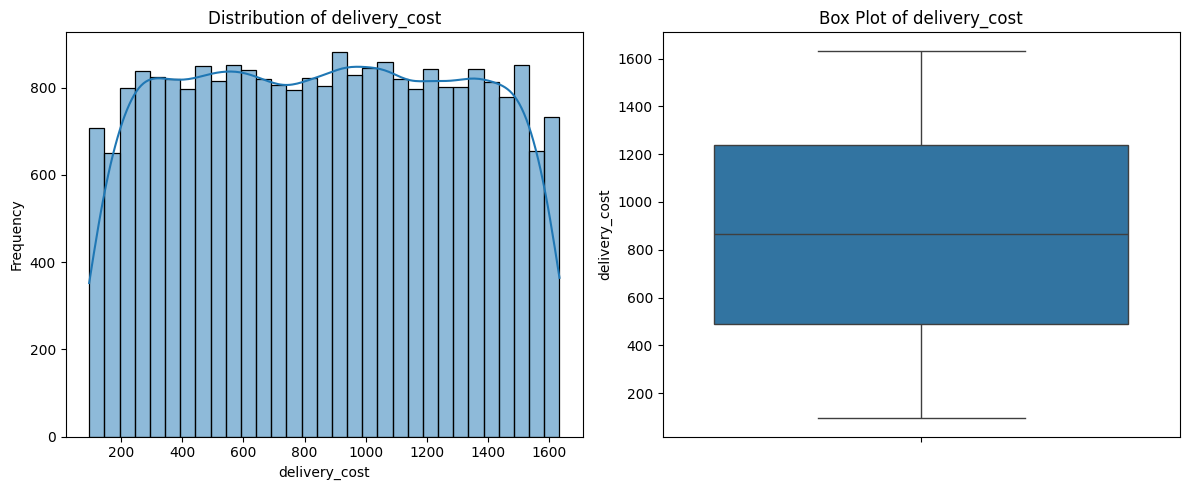

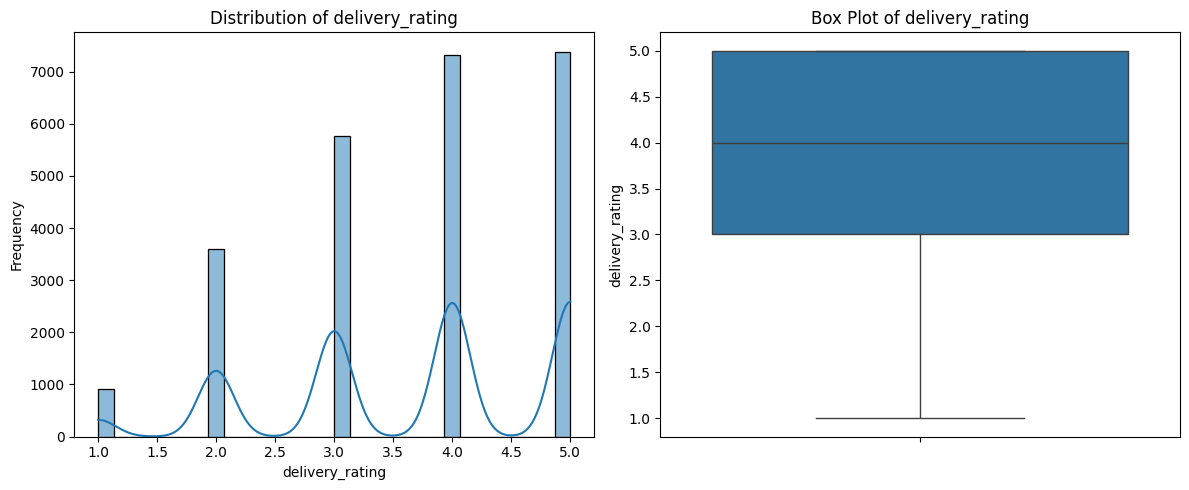

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical columns to analyze
numerical_cols = ['distance_km', 'package_weight_kg', 'delivery_cost', 'delivery_rating']

# Plotting histograms and box plots for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Box plot
    plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

    plt.tight_layout()
    plt.show()

## Analyse Bivariée

### Subtask:
Explorer les relations entre différentes paires de variables, par exemple, comment le delivery_cost varie selon le delivery_partner ou l'impact de weather_condition sur le statut delayed.


**Reasoning**:
To analyze the relationship between `delivery_cost` and `delivery_partner`, I will group the DataFrame by `delivery_partner` and calculate the mean of `delivery_cost`. Then, to understand the impact of `weather_condition` on `delayed` status, I will create a cross-tabulation of these two columns and calculate the percentage of delayed deliveries for each weather condition.



In [ ]:
print("\nMoyenne du delivery_cost par delivery_partner:")
print(df.groupby('delivery_partner')['delivery_cost'].mean().sort_values(ascending=False))

print("\nImpact de weather_condition sur le statut delayed:")
delay_by_weather = df.groupby('weather_condition')['delayed'].value_counts(normalize=True).unstack().fillna(0)

# Multiply by 100 to get percentages and round to 2 decimal places
delay_by_weather_percentage = (delay_by_weather * 100).round(2)
print(delay_by_weather_percentage)



Moyenne du delivery_cost par delivery_partner:
delivery_partner
dhl                 872.831125
ekart               869.966720
ecom express        868.772186
shadowfax           868.340156
xpressbees          868.165768
amazon logistics    868.150131
blue dart           863.021705
fedex               857.355640
delhivery           848.109810
Name: delivery_cost, dtype: float64

Impact de weather_condition sur le statut delayed:
delayed               no    yes
weather_condition              
clear              82.57  17.43
cold               83.98  16.02
foggy              69.68  30.32
hot                82.88  17.12
rainy              62.65  37.35
stormy             58.55  41.45


## Visualisation des Données Clés

### Subtask:
Créer des graphiques pertinents pour visualiser les distributions des variables et les relations identifiées lors des analyses univariées et bivariées.


## Summary:

### Data Analysis Key Findings

*   The dataset comprises 25,000 entries and 15 columns. Initially, `delivery_time_hours` and `expected_time_hours` were identified as `object` type, requiring conversion for time-based analysis.
*   No missing values were found across any of the 15 columns, simplifying data cleaning efforts.
*   Numerical variables exhibit diverse ranges: `distance_km` spans from 3.6 km to 297.1 km (average ~150.39 km), `package_weight_kg` from 0.67 kg to 49.52 kg (average ~25.15 kg), and `delivery_cost` from 95.67 to 1632.72 (average ~864.94). `delivery_rating` ranges from 1 to 5, with an average of 3.67.
*   Categorical variable distributions generally show a good balance among their unique values, with slight variations. However, `delayed` status is notably imbalanced, with 'no' (18,331 occurrences) significantly outnumbering 'yes' (6,669 occurrences). Similarly, `delivery_status` is predominantly 'delivered' (18,331), followed by 'delayed' (5,341) and 'failed' (1,328).
*   **Bivariate Analysis - Delivery Cost by Partner**: `DHL` had the highest average delivery cost ($\$872.83$), while `Delhivery` recorded the lowest average cost ($\$848.11$). Other partners' average costs clustered between $\$860$ and $\$870$.
*   **Bivariate Analysis - Weather Impact on Delays**: Adverse weather conditions significantly increase delivery delays. `Stormy` weather led to the highest percentage of delayed deliveries (41.45%), followed by `rainy` (37.35%) and `foggy` (30.32%). In contrast, `clear`, `hot`, and `cold` weather conditions showed much lower delay rates (17.43%, 17.12%, and 16.02% respectively).

### Insights or Next Steps

*   The strong correlation between adverse `weather_condition` and `delayed` deliveries suggests opportunities for proactive operational adjustments, such as dynamic rerouting or staffing changes, during inclement weather to mitigate delays.
*   Further investigation into the `delivery_cost` variations among partners, particularly the difference between `DHL` and `Delhivery`, could reveal insights into cost efficiency and competitive pricing strategies.
